In [2]:
from wavebeat.tracker import beatTracker

beat, downbeats = beatTracker('./Mini1.wav', ckpt_dir = "./checkpoints/")

Loaded multichannel audio. Summing to mono...


In [2]:
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.5 MB/s eta 0:00:00m eta 0:00:010:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchmetrics 1.3.2 requires torch>=1.10.0, but you have torch 1.7.1+cu110 which is incompatible.


In [17]:
%pwd

'/home/tttt1123/wavebeat'

In [19]:
#print(beat)
from numpy import savetxt
savetxt('./beat_Mini1.csv', beat, delimiter=',')

# Kaggle

# Testing

In [ ]:
# Note: Jazz.00054 is not readable

In [4]:
!python simple_test.py --logdir ./log  --num_workers 8 --preload 

./Wavebeat/3set_pretrain/checkpoints/epoch=22-step=29074.ckpt/hparams.yaml
Traceback (most recent call last):
  File "simple_test.py", line 54, in <module>
    raise RuntimeError(f"No hparams.yaml file found in {args.logdir}.")
RuntimeError: No hparams.yaml file found in ./Wavebeat/3set_pretrain/checkpoints/epoch=22-step=29074.ckpt.


In [5]:
## Juke test
!python simple_test.py --juke --logdir ./log --eval_length 8192 --num_workers 8 --ckpt_path "./Wavebeat/juke_right_sr/epoch=60-step=11468.ckpt"

./log/hparams.yaml
base!
Mode initialized For Juke!
dtc constructed!
Global seed set to 42
Selected 217 files for full-val set from smc dataset.
  0%|                                                   | 0/217 [00:00<?, ?it/s]load from juke!!
load from juke!!
load from juke!!
load from juke!!
load from juke!!
load from juke!!
load from juke!!
load from juke!!
load from juke!!
load from juke!!
load from juke!!
load from juke!!
load from juke!!
load from juke!!
load from juke!!
load from juke!!
load from juke!!

/home/tttt1123/anaconda3/envs/wavebeat/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/tttt1123/anaconda3/envs/wavebeat/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
beat 0.566 mean: nan  
downbeat: 0.541 mean: nan
  0%|▏                                          | 1/217 [

# Train

In [ ]:
import wandb
    wandb.login(key="c5af30930f4826bc232d6a9319422ed109b9e3c3")


In [8]:
!python train.py  --gpus 2 --preload --precision 16 --patience 10 --train_length 2097152 --eval_length 2097152 --model_type dstcn --act_type PReLU --norm_type BatchNorm --channel_width 32 --channel_growth 32 --augment --batch_size 8 --lr 1e-3 --gradient_clip_val 4.0 --audio_sample_rate 22050 --num_workers 4 --max_epochs 100

^C
Traceback (most recent call last):
  File "train.py", line 17, in <module>
    from lightning.pytorch.loggers import WandbLogger
  File "/home/tttt1123/anaconda3/envs/wavebeat/lib/python3.8/site-packages/lightning/__init__.py", line 19, in <module>
    from lightning.fabric.fabric import Fabric  # noqa: E402
  File "/home/tttt1123/anaconda3/envs/wavebeat/lib/python3.8/site-packages/lightning/fabric/__init__.py", line 30, in <module>
    from lightning.fabric.fabric import Fabric  # noqa: E402
  File "/home/tttt1123/anaconda3/envs/wavebeat/lib/python3.8/site-packages/lightning/fabric/fabric.py", line 44, in <module>
    from lightning.fabric.connector import _PLUGIN_INPUT, _PRECISION_INPUT, _Connector, _is_using_cli
  File "/home/tttt1123/anaconda3/envs/wavebeat/lib/python3.8/site-packages/lightning/fabric/connector.py", line 53, in <module>
    from lightning.fabric.strategies import (
  File "/home/tttt1123/anaconda3/envs/wavebeat/lib/python3.8/site-packages/lightning/fabric/strate

In [7]:
# Finetune
!python train.py --preload --dropout 0 --gpus 2 --precision 16 --patience 10 --train_length 2097152 --eval_length 2097152 --model_type dstcn --act_type PReLU --norm_type BatchNorm --channel_width 32 --channel_growth 32 --augment --batch_size 8 --lr 1e-5 --gradient_clip_val 4.0 --audio_sample_rate 22050 --num_workers 4 --max_epochs 150 --devices 2 --accelerator "gpu"

Global seed set to 42
lightning_logs/full
wandb: Currently logged in as: tony900428. Use `wandb login --relogin` to force relogin
wandb: Appending key for api.wandb.ai to your netrc file: /home/tttt1123/.netrc
/home/tttt1123/anaconda3/envs/wavebeat/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:441: Setting `Trainer(gpus=2)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=2)` instead.
/home/tttt1123/anaconda3/envs/wavebeat/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:461: The flag `devices=2` will be ignored, instead the device specific number 2 will be used
Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
data loading...
juke:  False
Selected 177 files for train set from hainsworth dataset.
  1%|▍ 

In [ ]:
# juke
!python train.py --ckpt_dir "./Wavebeat/juke_right_sr" --juke --stride 1 --dropout 0 --gpus 2 --precision 16 --patience 10 --train_length 8192 --eval_length 8192 --model_type dstcn --act_type PReLU --norm_type BatchNorm --channel_width 32 --channel_growth 32 --augment --batch_size 8 --lr 1e-3 --gradient_clip_val 4.0 --audio_sample_rate 345 --num_workers 4 --max_epochs 100 --devices 2 --accelerator "gpu"

Global seed set to 42
lightning_logs/full
wandb: Currently logged in as: tony900428. Use `wandb login --relogin` to force relogin
wandb: Appending key for api.wandb.ai to your netrc file: /home/tttt1123/.netrc
/home/tttt1123/anaconda3/envs/wavebeat/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:441: Setting `Trainer(gpus=2)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=2)` instead.
/home/tttt1123/anaconda3/envs/wavebeat/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:461: The flag `devices=2` will be ignored, instead the device specific number 2 will be used
Using 16bit native Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
data loading...
juke:  True
Selected 177 files for train set from hainsworth dataset.
Selected

In [2]:
# no mix precision
!python train.py --preload --from_disk --dropout 0 --gpus 2 --precision 32 --patience 10 --train_length 2097152 --eval_length 2097152 --model_type dstcn --act_type PReLU --norm_type BatchNorm --channel_width 32 --channel_growth 32 --augment --batch_size 4 --lr 1e-3 --gradient_clip_val 4.0 --audio_sample_rate 22050 --num_workers 4 --max_epochs 100 --devices 2 --accelerator "gpu"

  File "train.py", line 156
    =True if args.precision == 16 else False,
    ^
SyntaxError: invalid syntax


In [5]:
import librosa
import numpy as np
import torch

# x, sr = librosa.load("./dataset/rhythm/audio/37980.mp3")
# print(np.max(x))

audios = torch.load("/home/tttt1123/wavebeat_new/rhythm_targets_val.pt")

In [14]:
#print(audios[20].shape)
type(audios)

torch.Tensor

In [3]:
train_dataset = torch.load("./dataset/train.pt")

(60,)
(352, 2, 8192)
[   7   24   41   58   75   92  110  127  144  162  179  196  213  230
  248  265  282  299  317  334  351  368  385  403  420  437  454  471
  489  506  523  540  558  575  592  609  627  644  661  678  695  713
  730  747  764  781  799  816  833  850  868  885  902  919  937  954
  971  988 1006 1023 1040 1057 1074 1091 1109 1126 1143 1160 1178 1195
 1212 1229 1247 1264 1281 1298 1316 1333 1350 1367 1385 1402 1419 1436
 1454 1471 1488 1505 1522 1539 1557 1574 1591 1608 1626 1643 1660 1677
 1695 1712 1729 1746 1764 1781 1798 1815 1833 1850 1867 1884 1901 1918
 1936 1953 1970 1987 2005 2022 2039 2056 2073 2091 2108 2125 2142 2160
 2177 2194 2211 2229 2246 2263 2280 2297 2315 2332 2349 2366 2383 2401
 2418 2435 2453 2470 2487 2504 2522 2539 2556 2573 2590 2608 2625 2642
 2659 2676 2693 2711 2728 2745 2762 2779 2796 2814 2831 2849 2866 2883
 2900 2918 2935 2952 2969 2986 3004 3021 3038 3056 3073 3090 3107 3124
 3142 3159 3176 3193 3211 3228 3245 3262 3279 3296 3314 

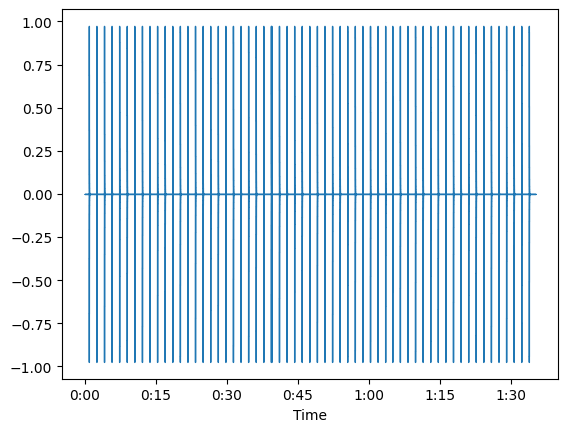

In [30]:
import librosa
import soundfile as sf
import torch
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
audios = torch.load("./dataset/data/rhythm_audios_val.pt")
targs = torch.load("./dataset/data/rhythm_targets_val.pt")
audio = audios[3]
audio = audio.reshape(-1)
targ = targs[3][0]

#print(targ.shape)
frames = (targ == 1).nonzero(as_tuple=True)[0]
print(np.array(frames).shape)
print(np.array(targs).shape)
audio = np.array(audio)
#y_beats = librosa.clicks(frames=[50, 1000], length=len(targ), sr=22050//256)
tempo, beats = librosa.beat.beat_track(y=audio, sr=22050)
print(beats)
y_beats = librosa.clicks(frames=frames*256, length=audio.shape[-1], sr=22050, hop_length=1)
#y_beats = librosa.resample(y_beats, orig_sr = 22050//256, target_sr = 22050)
#y_beats = y_beats[:np.array(audio).shape[-1]]
#print(y_beats.shape)
#out = y_beats + np.array(audio).reshape(-1)
#sf.write("out.wav", out, 22050)
print(y_beats.shape)
plt.figure()
librosa.display.waveshow(y_beats, sr=22050, label='Beat clicks')
Audio(data=y_beats*0.5+audio, rate=22050)

In [7]:
print(len(train_dataset))
print(len(val_dataset))

3000
220


In [6]:
i = 0
while 1:
    print(val_dataset[i][2])
    i = i +1

{'Filename': './dataset/rhythm/audio/100389.mp3', 'Genre': 'audio', 'Time signature': 'Nan'}
{'Filename': './dataset/rhythm/audio/99439.mp3', 'Genre': 'audio', 'Time signature': 'Nan'}
{'Filename': './dataset/rhythm/audio/725826.mp3', 'Genre': 'audio', 'Time signature': 'Nan'}
{'Filename': './dataset/rhythm/audio/112416.mp3', 'Genre': 'audio', 'Time signature': 'Nan'}
{'Filename': './dataset/rhythm/audio/313657.mp3', 'Genre': 'audio', 'Time signature': 'Nan'}
{'Filename': './dataset/rhythm/audio/763494.mp3', 'Genre': 'audio', 'Time signature': 'Nan'}
{'Filename': './dataset/rhythm/audio/47302.mp3', 'Genre': 'audio', 'Time signature': 'Nan'}
{'Filename': './dataset/rhythm/audio/36832.mp3', 'Genre': 'audio', 'Time signature': 'Nan'}
{'Filename': './dataset/rhythm/audio/27701.mp3', 'Genre': 'audio', 'Time signature': 'Nan'}
{'Filename': './dataset/rhythm/audio/511420.mp3', 'Genre': 'audio', 'Time signature': 'Nan'}
{'Filename': './dataset/rhythm/audio/592095.mp3', 'Genre': 'audio', 'Time 

IndexError: list index out of range

In [11]:
import glob
import os
audio_files1 = glob.glob(os.path.join("./dataset/rhythm/audio", "*.mp3"))
audio_files2 = glob.glob(os.path.join("./dataset/BallroomData", "**", "*.wav"))
audio_files3 = glob.glob(os.path.join("./dataset/Hainsworth/wavs", "*.wav"))
print(len(audio_files1) + len(audio_files2) + len(audio_files3))

4436


In [4]:
!pip show pytorch_lightning

Name: pytorch-lightning
Version: 1.1.8
Summary: PyTorch Lightning is the lightweight PyTorch wrapper for ML researchers. Scale your models. Write less boilerplate.
Home-page: https://github.com/PyTorchLightning/pytorch-lightning
Author: William Falcon et al.
Author-email: waf2107@columbia.edu
License: Apache-2.0
Location: /home/tttt1123/anaconda3/envs/wavebeat/lib/python3.8/site-packages
Requires: fsspec, future, numpy, PyYAML, tensorboard, torch, tqdm
Required-by: lightning


In [13]:
!pip show torchaudio

Name: torchaudio
Version: 0.13.0
Summary: An audio package for PyTorch
Home-page: https://github.com/pytorch/audio
Author: Soumith Chintala, David Pollack, Sean Naren, Peter Goldsborough
Author-email: soumith@pytorch.org
License: UNKNOWN
Location: /home/tttt1123/anaconda3/envs/wavebeat/lib/python3.8/site-packages
Requires: torch
Required-by: 


/bin/bash: line 1: conda: command not found


# Others

In [14]:
!wget https://mtg.upf.edu/ismir2004/contest/tempoContest/data1.tar.gz


--2024-03-11 04:08:25--  https://mtg.upf.edu/ismir2004/contest/tempoContest/data1.tar.gz
Resolving mtg.upf.edu (mtg.upf.edu)... 84.89.139.55
Connecting to mtg.upf.edu (mtg.upf.edu)|84.89.139.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1453888083 (1.4G) [application/octet-stream]
Saving to: ‘data1.tar.gz’

data1.tar.gz        100%[===================>]   1.35G   808KB/s    in 26m 50s 

2024-03-11 04:35:16 (882 KB/s) - ‘data1.tar.gz’ saved [1453888083/1453888083]

